In [1]:
#Based on implementation found here: https://github.com/madagra/basic-pinn/blob/main/logistic_equation_1d.py

In [2]:
import torch
import torch.nn as nn
from numpy import pi
from numpy import cos 

In [3]:
batch_size = 10
#X = torch.rand(batch_size, 1, requires_grad=True)
X = torch.linspace(0,1,batch_size,requires_grad=True).reshape(batch_size,1)

In [4]:
#note that the amount of parameters needed here is much higher than traditional differential equation simulation methods.
approx = nn.Sequential(
    nn.Linear(1,10),
    nn.Tanh(),
    nn.Linear(10,10),
    nn.Tanh(),
    nn.Linear(10,10),
    nn.Tanh(),
    nn.Linear(10,10),
    nn.Tanh(),
    nn.Linear(10,10),
    nn.Tanh(),
    nn.Linear(10,100),
    nn.Tanh(),
    nn.Linear(100,10),
    nn.Tanh(),
    nn.Linear(10,1)
)
#use Tanh() so that 2nd derivatives are nonzero.

In [5]:
def f(x):
  return approx(x)

def df(x):
  val = f(x)
  return torch.autograd.grad(val,x,grad_outputs=torch.ones_like(x),create_graph=True,retain_graph=True)[0]

def ddf(x):
  val = df(x)
  return torch.autograd.grad(val,x,grad_outputs=torch.ones_like(x),create_graph=True,retain_graph=True)[0]

In [6]:
def loss(x):
  reg_constant = 400
  C = 4*pi*pi
  eq = C*f(x) + ddf(x)
  initial = f(torch.zeros(1)) - torch.ones(1)
  full = eq**2 + reg_constant*initial**2
  return full.mean()

In [7]:
optimizer = torch.optim.SGD(approx.parameters(), lr=.0001)

In [8]:
losses = []
for epoch in range(20000):
    
    error = loss(X)
    losses.append(error.item())

    approx.zero_grad()
    error.backward()

    optimizer.step()

In [9]:
x_real = torch.linspace(0,1,20)
y_real = cos(2*pi*x_real)
y_approx = approx(x_real.reshape(20,1))

In [10]:
import matplotlib.pyplot as plt

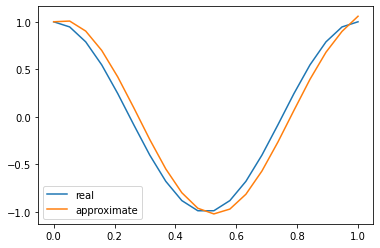

In [11]:
plt.plot(x_real, y_real, label = "real")
plt.plot(x_real, y_approx.detach().numpy(), label = "approximate")
plt.legend()

In [12]:
losses[-1]

0.0009504564222879708

Text(0.5, 1.0, 'Convergence Plot')

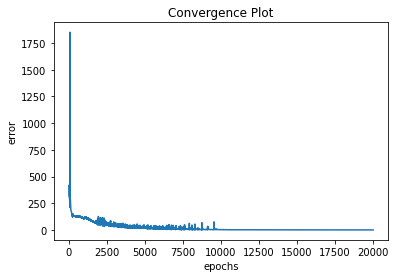

In [13]:
plt.plot(range(20000), losses)
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Convergence Plot')

In [14]:
#C0 error
test_size = 100
test_set = torch.rand(test_size,1)
error = (approx(test_set)-cos(2*pi*test_set)).max()

In [15]:
print(error.item())

0.17995132505893707
